In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
class ZFnet:
  def __init__(self, input_shape=(224, 224, 1), classes=100):
    self.model = None
    self.input_shape = input_shape
    self.classes = classes

  def build_model(self):
    model = keras.models.Sequential([
        
        #First Layer
        keras.layers.Conv2D(96, kernel_size=(7, 7), strides=2,
                            input_shape=self.input_shape, activation='relu',),
        keras.layers.MaxPool2D((3, 3), strides=2),
        keras.layers.BatchNormalization(axis=3),

        #Second Layer
        keras.layers.Conv2D(256, kernel_size=(5, 5), strides=2,
                            activation='relu'),
        keras.layers.MaxPool2D((3, 3), strides=2),
        keras.layers.BatchNormalization(axis=3),

        #Third Layer
        keras.layers.Conv2D(384, kernel_size=(3, 3), strides=1,
                            padding='same', activation='relu'),

        #Fourth Layer
        keras.layers.Conv2D(384, kernel_size=(3, 3), strides=1,
                            padding='same', activation='relu'),

        #Fifth Layer
        keras.layers.Conv2D(256, kernel_size=(3, 3), strides=1,
                            padding='same', activation='relu'),
        keras.layers.MaxPool2D((3, 3), strides=2),
        
        keras.layers.Flatten(),

        #Sixth Layer
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),

        #Seventh Layer
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        
        #Output Layer
        keras.layers.Dense(self.classes, activation='softmax')
    ])

    self.model = model
    return self.model

  def compile_model(self):
    optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, 
                                    momentum=0.9, nesterov=True)
    
    self.model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                       metrics=['accuracy'])
    return self.model

  def train_model(self, x_train, y_train, batch_size=32, epochs=10, val_data=None):
    if val_data != None:
      self.model.fit(x_train, y_train, batch_size=batch_size,
                     epochs=epochs)
    else:
      self.model.fit(x_train, y_train, batch_size=batch_size,
                     epochs=epochs, validation_data=val_data)
    return self.model


  def predict(self, image):
    prediction = self.model.predict(image)
    return prediction

  def model_summary(self):
    self.model.summary()

  def plot_model(self, name='model.png'):
    return keras.utils.plot_model(self.model, 'model.png')

In [0]:
ZFnet_model = ZFnet()

In [4]:
ZFnet_model.build_model()

In [5]:
ZFnet_model.compile_model()

In [6]:
ZFnet_model.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 109, 109, 96)      4800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 54, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       8

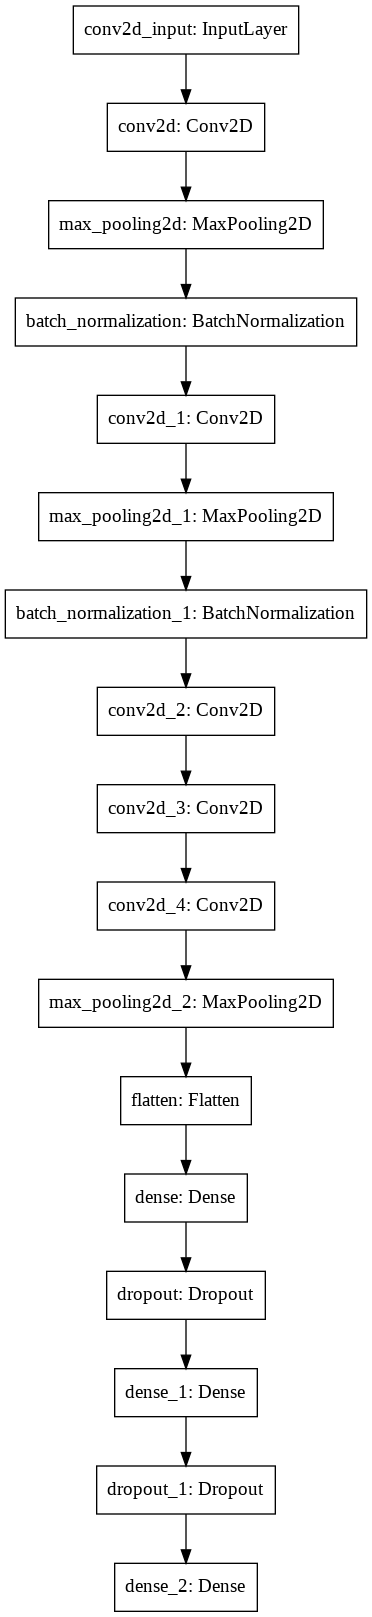

In [7]:
ZFnet_model.plot_model()